In [21]:
import pandas as pd


df = pd.read_csv('reduced_housing_data_noland_or_mfh.csv')

print(df.head())
print(df.columns)

   Unnamed: 0             list_date  address.lat  address.lon  lot_size.size  \
0           0  2021-03-05T17:49:21Z    39.926237   -75.176307          700.0   
1           1  2021-02-17T20:47:19Z    40.069313   -75.075879         3171.0   
2           2  2021-02-05T19:01:14Z    40.001261   -75.117655          602.0   
3           3  2021-01-26T16:59:31Z    39.987430   -75.100497          909.0   
4           4  2020-11-20T16:02:24Z    39.937969   -75.179954         1044.0   

  prop_type  year_built  beds     price  baths_full  baths_half  \
0     condo      1920.0   3.0  160000.0         1.0         0.0   
1     condo      1957.0   3.0  265000.0         1.0         1.0   
2     condo      1920.0   2.0   25000.0         1.0         0.0   
3     condo      1920.0   3.0  265000.0         1.0         1.0   
4     condo      2020.0   3.0  742500.0         3.0         1.0   

   is_new_construction  address.postal_code  \
0                False                19145   
1                False

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# label encode new_construction feature
labelencoder = LabelEncoder()
df['is_new_construction'] = labelencoder.fit_transform(df['is_new_construction'])
pd.set_option('display.max_rows', df.shape[0]+1)
print(df.head())

   Unnamed: 0             list_date  address.lat  address.lon  lot_size.size  \
0           0  2021-03-05T17:49:21Z    39.926237   -75.176307          700.0   
1           1  2021-02-17T20:47:19Z    40.069313   -75.075879         3171.0   
2           2  2021-02-05T19:01:14Z    40.001261   -75.117655          602.0   
3           3  2021-01-26T16:59:31Z    39.987430   -75.100497          909.0   
4           4  2020-11-20T16:02:24Z    39.937969   -75.179954         1044.0   

  prop_type  year_built  beds     price  baths_full  baths_half  \
0     condo      1920.0   3.0  160000.0         1.0         0.0   
1     condo      1957.0   3.0  265000.0         1.0         1.0   
2     condo      1920.0   2.0   25000.0         1.0         0.0   
3     condo      1920.0   3.0  265000.0         1.0         1.0   
4     condo      2020.0   3.0  742500.0         3.0         1.0   

   is_new_construction  address.postal_code  \
0                    0                19145   
1                    0

In [23]:
df.isnull().sum()

Unnamed: 0                      0
list_date                    1668
address.lat                   700
address.lon                   700
lot_size.size                 737
prop_type                      10
year_built                    281
beds                          982
price                           1
baths_full                    949
baths_half                      0
is_new_construction             0
address.postal_code             0
address.neighborhood_name     704
building_size.size             48
garage                          0
Zip Code                        0
Population                      0
% Unemployment Rate             0
Avg. Income/H/hold              0
dtype: int64

In [24]:
# drop incomplete records
df.dropna(subset=['price', 'baths_full', 'address.lat', 'address.lon', 'prop_type'], inplace=True)
print(df.isnull().sum()/df.shape[0])
print(df.isnull().sum())
df.info()

Unnamed: 0                   0.000000
list_date                    0.124293
address.lat                  0.000000
address.lon                  0.000000
lot_size.size                0.087163
prop_type                    0.000000
year_built                   0.032601
beds                         0.017885
price                        0.000000
baths_full                   0.000000
baths_half                   0.000000
is_new_construction          0.000000
address.postal_code          0.000000
address.neighborhood_name    0.000679
building_size.size           0.009509
garage                       0.000000
Zip Code                     0.000000
Population                   0.000000
% Unemployment Rate          0.000000
Avg. Income/H/hold           0.000000
dtype: float64
Unnamed: 0                     0
list_date                    549
address.lat                    0
address.lon                    0
lot_size.size                385
prop_type                      0
year_built                 

In [25]:
# fill missing neighborhood values
filling_val_neighborhood = "Generic Neighborhood"
df['address.neighborhood_name']=df['address.neighborhood_name'].fillna(filling_val_neighborhood)
df['address.neighborhood_name']=df['address.neighborhood_name'].astype('str')
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4417 entries, 0 to 5824
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4417 non-null   int64  
 1   list_date                  3868 non-null   object 
 2   address.lat                4417 non-null   float64
 3   address.lon                4417 non-null   float64
 4   lot_size.size              4032 non-null   float64
 5   prop_type                  4417 non-null   object 
 6   year_built                 4273 non-null   float64
 7   beds                       4338 non-null   float64
 8   price                      4417 non-null   float64
 9   baths_full                 4417 non-null   float64
 10  baths_half                 4417 non-null   float64
 11  is_new_construction        4417 non-null   int64  
 12  address.postal_code        4417 non-null   int64  
 13  address.neighborhood_name  4417 non-null   objec

In [26]:
# Fill missing year_built, beds, and building_size data using median values, lat, long, prop type, lot size
import datetime as dt
median_beds = df['beds'].median()
median_year_built = df['year_built'].median()
median_building_size = df['building_size.size'].median()
median_lot_size = df['lot_size.size'].median()

print("median beds = {}".format(median_beds))
print("median year_built = {}".format(median_year_built))
print("median building_size = {}".format(median_building_size))
print("median building_size = {}".format(median_lot_size))

df['beds'] = df['beds'].fillna(median_beds)
df['year_built'] = df['year_built'].fillna(median_year_built)
df['building_size.size'] = df['building_size.size'].fillna(median_building_size)
df['lot_size.size'] = df['lot_size.size'].fillna(median_lot_size)

df['list_date'] = pd.to_datetime(df['list_date'])
df['list_date']=df['list_date'].map(dt.datetime.toordinal)
print(df.head())
print(df.info())
print(df.isnull().sum())

median beds = 3.0
median year_built = 1930.0
median building_size = 1350.0
median building_size = 1344.0
   Unnamed: 0  list_date  address.lat  address.lon  lot_size.size prop_type  \
0           0     737854    39.926237   -75.176307          700.0     condo   
1           1     737838    40.069313   -75.075879         3171.0     condo   
2           2     737826    40.001261   -75.117655          602.0     condo   
3           3     737816    39.987430   -75.100497          909.0     condo   
4           4     737749    39.937969   -75.179954         1044.0     condo   

   year_built  beds     price  baths_full  baths_half  is_new_construction  \
0      1920.0   3.0  160000.0         1.0         0.0                    0   
1      1957.0   3.0  265000.0         1.0         1.0                    0   
2      1920.0   2.0   25000.0         1.0         0.0                    0   
3      1920.0   3.0  265000.0         1.0         1.0                    0   
4      2020.0   3.0  742500.0 

In [27]:
df = df.drop('address.postal_code', axis=1)
df.to_csv('preprocessed_data.csv')

In [27]:
# OHE data
prop_type_df = pd.get_dummies(merged_left['prop_type'], prefix='prop_type')


zip_df = pd.get_dummies(merged_left['address.postal_code'], prefix='zip')


neighborhood_df = pd.get_dummies(merged_left['address.neighborhood_name'], prefix='neighborhood')

#encoded df
enc_df = pd.concat([merged_left, prop_type_df, zip_df, neighborhood_df], axis=1)


In [31]:
print(enc_df.head())
enc_df = enc_df.drop(['prop_type', 'address.postal_code', 'address.neighborhood_name'], axis=1)


   Unnamed: 0           last_update  year_built  beds     price  baths_full  \
0           0  2021-03-21T08:42:53Z      1925.0   3.0  247500.0         2.0   
1           1  2021-03-20T10:38:16Z      1920.0   3.0  210000.0         1.0   
2           2  2021-03-20T11:44:06Z      1970.0   3.0  229000.0         2.0   
3           3  2021-03-20T16:00:12Z      1925.0   2.0  691000.0         1.0   
4           4  2021-03-21T15:14:52Z      1915.0   3.0  120000.0         1.0   

   baths_half  is_new_construction  building_size.size  garage  ...  \
0         0.0                    0              2100.0       0  ...   
1         1.0                    0              1200.0       0  ...   
2         1.0                    0              1566.0       0  ...   
3         1.0                    0              2000.0       1  ...   
4         1.0                    0              1104.0       0  ...   

   neighborhood_West Oak Lane - Philadelphia,PA  \
0                                             0

KeyError: "['prop_type' 'address.postal_code' 'address.neighborhood_name'] not found in axis"

In [32]:
print(enc_df.shape)

(4880, 172)


In [33]:
# normalize data
enc_df.to_csv('preprocessed.csv')

In [97]:
enc_no_neigh_df = pd.concat([merged_left, prop_type_df, zip_df], axis=1)
enc_no_neigh_df = enc_no_neigh_df.drop(['prop_type', 'address.postal_code', 'address.neighborhood_name'], axis=1)



In [105]:
enc_no_zip_df = pd.concat([merged_left, prop_type_df], axis=1)
enc_no_zip_df = enc_no_zip_df.drop(['prop_type', 'address.postal_code', 'address.neighborhood_name', 'last_update'], axis=1)

In [122]:
enc_no_neigh_df = enc_no_neigh_df.drop(['last_update'], axis=1)


KeyError: "['last_update'] not found in axis"

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print(enc_no_neigh_df.columns)
# drop date column
# enc_df = enc_df.drop(['last_update'], axis=1)
# Split the data into two subsets and normalize the features of samples
house_fea = enc_no_neigh_df.drop('price', axis=1).values
house_res = enc_no_neigh_df['price'].values

# Split the dataset into the train_val set and testing set.
X_train, X_test, y_train, y_test = train_test_split(house_fea, house_res, 
                                                            test_size=0.2, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

# Normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

Index(['Unnamed: 0', 'year_built', 'beds', 'price', 'baths_full', 'baths_half',
       'is_new_construction', 'building_size.size', 'garage', 'Zip Code',
       'Population', '% Unemployment Rate', 'Avg. Income/H/hold',
       'prop_type_commercial', 'prop_type_condo', 'prop_type_government',
       'prop_type_single_family', 'zip_19102', 'zip_19103', 'zip_19104',
       'zip_19106', 'zip_19107', 'zip_19111', 'zip_19114', 'zip_19115',
       'zip_19116', 'zip_19118', 'zip_19119', 'zip_19120', 'zip_19121',
       'zip_19122', 'zip_19123', 'zip_19124', 'zip_19125', 'zip_19126',
       'zip_19127', 'zip_19128', 'zip_19129', 'zip_19130', 'zip_19131',
       'zip_19132', 'zip_19133', 'zip_19134', 'zip_19135', 'zip_19136',
       'zip_19137', 'zip_19138', 'zip_19139', 'zip_19140', 'zip_19141',
       'zip_19142', 'zip_19143', 'zip_19144', 'zip_19145', 'zip_19146',
       'zip_19147', 'zip_19148', 'zip_19149', 'zip_19150', 'zip_19151',
       'zip_19152', 'zip_19153', 'zip_19154'],
      dtyp

In [111]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Train the ridge regression model lambda = 0.1
rr = Ridge(alpha=0.1)

rr.fit(X_train, y_train)

print("bias is "+str(rr.intercept_))
print("coefficients  are "+str(rr.coef_))

y_train_pred_rr = rr.predict(X_train)

mae_rr = mean_absolute_error(y_train_pred_rr,y_train)
mse_rr = mean_squared_error(y_train_pred_rr,y_train)
rmse_rr = np.sqrt(mse_rr)

print('prediction for training set:')
print('MAE is: {}'.format(mae_rr))
print('MSE is: {}'.format(mse_rr))
print('RMSE is: {}'.format(rmse_rr))
print('R-Squared is: {}'.format(rr.score(X_train, y_train)))

bias is 323404.4620901625
coefficients  are [  4676.18041159  12136.80823875  31823.29154538  82105.6831041
  38048.80350788   2182.69124699  26443.92575324  33817.11569017
 -10617.12998504 -34849.72022942  -7435.83355757   3463.23780574
   1799.46525755 -13933.34475698   2855.66794925  13650.59227563
  16379.46081782  53016.46138745  -1007.49353094  36360.73453093
  13636.88551142 -15169.23430795 -22088.05313319 -19955.95137866
 -19642.86640449  28083.40314909  -9575.94744391  -7547.50169925
  -7413.13979537  -2090.64722355  16530.59089824 -11002.62577569
   7703.26655545 -21172.46832565   1251.52474347  -8089.13752663
  -1183.34365945  21631.58652727 -10048.86973463 -10272.2038018
  -8191.93731924  -2791.0041678  -18418.71673308 -13867.56276844
 -10022.03540072 -15443.83619244  -6313.72566708  -8228.51352634
 -15466.68611368 -11608.00546981   5923.69675947 -16396.16429037
   6653.41280928  41263.89661613  40621.61169426  16288.88587877
  -8223.60488041 -14404.42040584 -15835.74206077

prediction for testing set: Ridge
MAE is: 101933.96830312388
MSE is: 32515372454.27583
RMSE is: 180320.1942497729
R-Squared is: 0.6013018271296905


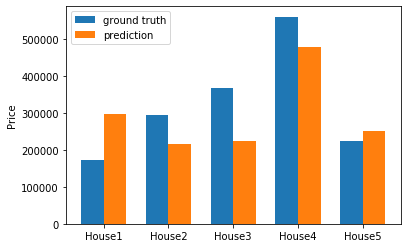

In [112]:
import matplotlib.pyplot as plt

# Evaluate the model
y_test_pred_rr = rr.predict(X_test)
mae_rrp = mean_absolute_error(y_test_pred_rr,y_test)
mse_rrp = mean_squared_error(y_test_pred_rr,y_test)
rmse_rrp = np.sqrt(mse_rrp)

print('prediction for testing set: Ridge')
print('MAE is: {}'.format(mae_rrp))
print('MSE is: {}'.format(mse_rrp))
print('RMSE is: {}'.format(rmse_rrp))
print('R-Squared is: {}'.format(rr.score(X_test, y_test)))

# Visualize the Ridge Regression model
labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig_rr, ax_rr = plt.subplots()
rects1_rr = ax_rr.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2_rr = ax_rr.bar(x + width/2, y_test_pred_rr[0:5], width, label='prediction')

ax_rr.set_ylabel('Price')
ax_rr.set_xticks(x)
ax_rr.set_xticklabels(labels)
ax_rr.legend()

plt.show()

In [120]:
# Train lasso regression model lambda = 0.1
lr = Lasso(alpha=0.1)

lr.fit(X_train, y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  are "+str(lr.coef_))

y_train_pred_lr = lr.predict(X_train)

mae_lr = mean_absolute_error(y_train_pred_lr,y_train)
mse_lr = mean_squared_error(y_train_pred_lr,y_train)
rmse_lr = np.sqrt(mse_lr)

print('prediction for training set:')
print('MAE is: {}'.format(mae_lr))
print('MSE is: {}'.format(mse_lr))
print('RMSE is: {}'.format(rmse_lr))
print('R-Squared is: {}'.format(lr.score(X_train, y_train)))

bias is 323404.4620901604
coefficients  are [  4676.25414263  12136.87970627  31823.98475824  82107.37305579
  38049.47846316   2181.6763407   26443.67211979  33817.84542403
 -27881.05009628 -67734.0779662   -9503.03624986  -7884.92794192
   -952.71189635 -26812.83093454   2292.25825597    986.17354663
   8859.34727979  41413.83717125  -3008.14893469  26533.03215347
   2709.55362865 -12055.68918883 -27720.42956113 -25638.1800427
 -23314.82105298  22787.13285669 -13626.88840227  -1749.60961082
 -13832.82612431 -10876.28777554   4478.27244607  -5336.66537332
  -1615.79725356 -26808.86659571  -6782.74483891  -9115.90564244
  -8419.89850454  14900.496477    -9008.03829385 -11494.65710391
 -11269.74515566   2150.84004567 -21364.77985979 -13097.50697379
 -15304.78307776 -16187.67042318  -5938.72469888  -4513.9116713
 -15933.59540844 -13725.66833852  16474.19129991 -13198.21827696
  10132.50867796  40701.44138495  40937.05964819  22070.13915061
  -2397.74265341 -14529.71442839 -15461.83422562

C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7569984009262.148, tolerance: 25818666028.54964
  positive)


prediction for testing set: Ridge
MAE is: 101934.99049639812
MSE is: 32515360858.12359
RMSE is: 180320.16209543397
R-Squared is: 0.6013019693198105


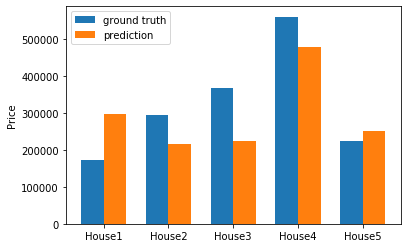

In [121]:
# Evaluate the model
y_test_pred_lr = lr.predict(X_test)
mae_lrp = mean_absolute_error(y_test_pred_lr,y_test)
mse_lrp = mean_squared_error(y_test_pred_lr,y_test)
rmse_lrp = np.sqrt(mse_lrp)

print('prediction for testing set: Ridge')
print('MAE is: {}'.format(mae_lrp))
print('MSE is: {}'.format(mse_lrp))
print('RMSE is: {}'.format(rmse_lrp))
print('R-Squared is: {}'.format(lr.score(X_test, y_test)))

# Visualize the Ridge Regression model
labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig_rr, ax_lr = plt.subplots()
rects1_lr = ax_lr.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2_lr = ax_lr.bar(x + width/2, y_test_pred_rr[0:5], width, label='prediction')

ax_lr.set_ylabel('Price')
ax_lr.set_xticks(x)
ax_lr.set_xticklabels(labels)
ax_lr.legend()

plt.show()

[[3547  519 1150 ... 2776 2723 1675]
 [2468 2958 3026 ... 2640  179 2801]
 [1588 2460 1456 ... 1348 2139 1443]
 ...
 [1523 3225  106 ... 3510 3741 3724]
 [ 584 1525 1481 ... 1700 1600 1332]
 [2215 2500 3775 ... 1025 3668  900]]
reg_coeff: 10000.0, mae: 96474.009
reg_coeff: 1000.0, mae: 96428.423
reg_coeff: 100.0, mae: 95985.337
reg_coeff: 10.0, mae: 92753.512
reg_coeff: 1.0, mae: 95814.491
reg_coeff: 0.1, mae: 139559.135
reg_coeff: 0.01, mae: 157624.341
reg_coeff: 0.001, mae: 159940.360
prediction for testing set: Ridge
MAE is: 98392.81933654436
MSE is: 32772188364.857727
RMSE is: 181030.90444688644
R-Squared is: 0.5981527924859381


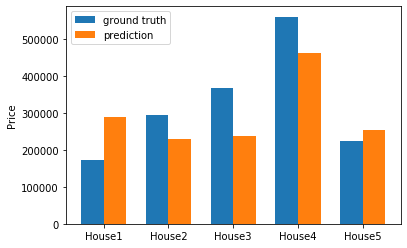

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [116]:
from sklearn.metrics import precision_score
from random import shuffle
import random
# Increase model performance by using 8-fold cross validation with Ridge Regression
def train(X_train_val, y_train_val):
    # Use the 10-fold cross-validation to select the hyperparameter lambda.
    folds = 8

    # get the number of samples in the training and validation set
    num_train_val = X_train_val.shape[0] 

    # shuffle the index of samples in the train_val set
    index_of_samples = np.arange(num_train_val) 
    shuffle(index_of_samples)

    # split the index of the train_valid set into 10 folds
    index_of_folds = index_of_samples.reshape(folds, -1)
    print(index_of_folds)

    regularization_coefficient = [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    best_acc = 0
    best_reg = 0
    best_MAE = 10000000000000000
    for reg in regularization_coefficient:
        sum_acc = 0
        sum_mae = 0
        for fold in range(folds):
            index_of_folds_temp = index_of_folds.copy()

            valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
            train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set

            # training set
            X_train = X_train_val[train_index]
            y_train = y_train_val[train_index]

            # validation set
            X_valid = X_train_val[valid_index]
            y_valid = y_train_val[valid_index]

            # build the model with different hyperparameters
            rr = Ridge(normalize=True, alpha=reg)

            #train the model with the training set
            rr.fit(X_train, y_train)

            y_valid_pred_rr = rr.predict(X_valid)
            acc = rr.score(X_valid, y_valid)
            mae = mean_absolute_error(y_valid_pred_rr, y_valid)
            sum_acc += acc
            sum_mae += mae
        cur_acc = sum_acc / folds
        cur_MAE = sum_mae / folds
        print("reg_coeff: {}, mae: {:.3f}".format(1.0/reg, cur_MAE))

        # store the best hyperparameter
        if cur_MAE < best_MAE:
            best_acc = cur_acc
            best_MAE = cur_MAE
            best_reg = reg
    return best_reg
        
    
def test(X_train, y_train, X_test, y_test, coeff):
    rr = Ridge(normalize=True, alpha=coeff)

    rr.fit(X_train, y_train)
    y_test_pred_rr = rr.predict(X_test)
    mae_rrp = mean_absolute_error(y_test_pred_rr,y_test)
    mse_rrp = mean_squared_error(y_test_pred_rr,y_test)
    rmse_rrp = np.sqrt(mse_rrp)

    print('prediction for testing set: Ridge')
    print('MAE is: {}'.format(mae_rrp))
    print('MSE is: {}'.format(mse_rrp))
    print('RMSE is: {}'.format(rmse_rrp))
    print('R-Squared is: {}'.format(rr.score(X_test, y_test)))

    # Visualize the Ridge Regression model
    labels = ['House1', 'House2', 'House3', 'House4', 'House5']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig_rr, ax_rr = plt.subplots()
    rects1_rr = ax_rr.bar(x - width/2, y_test[0:5], width, label='ground truth')
    rects2_rr = ax_rr.bar(x + width/2, y_test_pred_rr[0:5], width, label='prediction')

    ax_rr.set_ylabel('Price')
    ax_rr.set_xticks(x)
    ax_rr.set_xticklabels(labels)
    ax_rr.legend()

    plt.show()
    return rr
    
def run_ridge(X_train, y_train, X_test, y_test):
    coeff = train(X_train, y_train)
    rr = test(X_train, y_train, X_test, y_test, coeff)
    return rr
run_ridge(X_train, y_train, X_test, y_test)

In [117]:
# Ideas to increase accuracy: w/ neighborhoods OHE: .64, w/o neighborhoods: .71 (108 neighborhood features)
# Try lasso regression
# Play around with the features I include/encoding methods
print(len(rr.coef_))


62


[[ 566 3099 3205 ...  710 1748 1952]
 [2588 2746  988 ... 3249  301 1832]
 [ 755 3343 1639 ... 1345 3768 3748]
 ...
 [3255 3686 2321 ... 2635  593 1969]
 [ 149 1035 3865 ... 1858 3322  351]
 [2323 3872 2300 ...  337  160 3506]]


C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6924700266255.266, tolerance: 23352847709.624367
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6658116508278.8125, tolerance: 22215476446.166664
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6827272384888.336, tolerance: 22745790339.501945
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

reg_coeff: 10000.0, mae: 94816.466


C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6658199715046.898, tolerance: 22215476446.166664
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6827356227753.625, tolerance: 22745790339.501945
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5610102650595.32, tolerance: 20534715034.267887
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

reg_coeff: 1000.0, mae: 94816.404


C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6925630661331.492, tolerance: 23352847709.624367
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6659019574016.609, tolerance: 22215476446.166664
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6828182137482.469, tolerance: 22745790339.501945
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

reg_coeff: 100.0, mae: 94815.761


C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4041946386033.7734, tolerance: 23352847709.624367
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3877074763868.625, tolerance: 22215476446.166664
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3984001517799.5156, tolerance: 22745790339.501945
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

reg_coeff: 10.0, mae: 94809.378


C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83280482352.92188, tolerance: 23352847709.624367
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85028994548.17188, tolerance: 22215476446.166664
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34372241942.625, tolerance: 22745790339.501945
  positive)
C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

reg_coeff: 1.0, mae: 94756.251
reg_coeff: 0.1, mae: 94322.919
reg_coeff: 0.01, mae: 96592.202
reg_coeff: 0.001, mae: 129431.191
prediction for testing set: Lasso
MAE is: 101933.96830312388
MSE is: 32515372454.27583
RMSE is: 180320.1942497729
R-Squared is: 0.6016969533413697


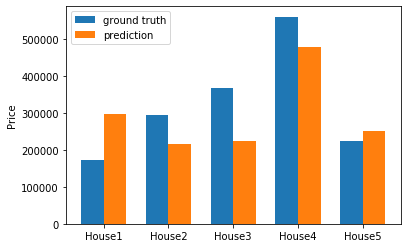

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [119]:
def train_lasso(X_train_val, y_train_val):
    # Use the 10-fold cross-validation to select the hyperparameter lambda.
    folds = 8

    # get the number of samples in the training and validation set
    num_train_val = X_train_val.shape[0] 

    # shuffle the index of samples in the train_val set
    index_of_samples = np.arange(num_train_val) 
    shuffle(index_of_samples)

    # split the index of the train_valid set into 10 folds
    index_of_folds = index_of_samples.reshape(folds, -1)
    print(index_of_folds)

    regularization_coefficient = [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    best_acc = 0
    best_reg = 0
    best_MAE = 10000000000000000
    for reg in regularization_coefficient:
        sum_acc = 0
        sum_mae = 0
        for fold in range(folds):
            index_of_folds_temp = index_of_folds.copy()

            valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
            train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set

            # training set
            X_train = X_train_val[train_index]
            y_train = y_train_val[train_index]

            # validation set
            X_valid = X_train_val[valid_index]
            y_valid = y_train_val[valid_index]

            # build the model with different hyperparameters
            lr = Lasso(normalize=True, alpha=reg)

            #train the model with the training set
            lr.fit(X_train, y_train)

            y_valid_pred_rr = lr.predict(X_valid)
            acc = lr.score(X_valid, y_valid)
            mae = mean_absolute_error(y_valid_pred_rr, y_valid)
            sum_acc += acc
            sum_mae += mae
        cur_acc = sum_acc / folds
        cur_MAE = sum_mae / folds
        print("reg_coeff: {}, mae: {:.3f}".format(1.0/reg, cur_MAE))

        # store the best hyperparameter
        if cur_MAE < best_MAE:
            best_acc = cur_acc
            best_MAE = cur_MAE
            best_reg = reg
    return best_reg
        
    
def test_lasso(X_train, y_train, X_test, y_test, coeff):
    lr = Lasso(normalize=True, alpha=coeff)

    lr.fit(X_train, y_train)
    y_test_pred_rr = rr.predict(X_test)
    mae_rrp = mean_absolute_error(y_test_pred_rr,y_test)
    mse_rrp = mean_squared_error(y_test_pred_rr,y_test)
    rmse_rrp = np.sqrt(mse_rrp)

    print('prediction for testing set: Lasso')
    print('MAE is: {}'.format(mae_rrp))
    print('MSE is: {}'.format(mse_rrp))
    print('RMSE is: {}'.format(rmse_rrp))
    print('R-Squared is: {}'.format(lr.score(X_test, y_test)))

    # Visualize the Ridge Regression model
    labels = ['House1', 'House2', 'House3', 'House4', 'House5']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig_rr, ax_rr = plt.subplots()
    rects1_rr = ax_rr.bar(x - width/2, y_test[0:5], width, label='ground truth')
    rects2_rr = ax_rr.bar(x + width/2, y_test_pred_rr[0:5], width, label='prediction')

    ax_rr.set_ylabel('Price')
    ax_rr.set_xticks(x)
    ax_rr.set_xticklabels(labels)
    ax_rr.legend()

    plt.show()
    return lr
def run_lasso(X_train, y_train, X_test, y_test):
    coeff = train_lasso(X_train, y_train)
    lr = test_lasso(X_train, y_train, X_test, y_test, coeff)
    return lr
run_lasso(X_train, y_train, X_test, y_test)
